# Bias-Variance Tradeoff

## Introduction

You've seen how you can extend your linear models by including interaction effects as well as polynomial terms. Including these in models comes at a price though: not only do the models become more complex (with more parameter estimates), adding more terms can potentially harm model performance when making predictions. This tradeoff between performance on the training data and performance making predictions is called the bias-variance tradeoff. You'll learn about that in this lesson.

The way I see it, imagine you're trying to predict how fast a car can go based on its weight. A simple way to do this is by drawing a straight line on a graph where one axis is weight and the other is speed. But what if the relationship between weight and speed isn't actually straight? What if it's more like a curve or it changes depending on other factors?

To account for these complexities, you can make your prediction model more sophisticated. You can add things like interactions (like how weight and engine size together affect speed) or polynomial terms (like weight squared, weight cubed, etc.). These additions allow your model to capture more nuanced relationships in the data.

But here's the catch: as your model gets more complicated with more terms, it becomes harder to understand and work with. It's like trying to remember a really long and complicated set of instructions. And sometimes, adding more terms can actually make your predictions less accurate. It's like having too many rules in a game, making it harder to play well.

This balance between how well your model fits the training data (the data you used to build the model) and how well it predicts new, unseen data is called the bias-variance tradeoff. It's like trying to find the sweet spot between a model that's too simple to capture all the patterns and one that's too complicated to make reliable predictions. In this lesson, you'll learn more about how to strike that balance effectively.

## Objectives

You will be able to:

- Describe the bias-variance tradeoff in machine learning 
- Discuss how bias and variance are related to over and underfitting 
- List the three components of error 

## Using Models for Prediction

You have learned earlier how to use regression models to make predictions. This is without any doubt one of the main reasons why regression models are used.

When building models for predicting, we have previously seen the need for model **validation**, which tells us how well the model is likely to perform on unseen data (not just the data used for training the model). The main two validation approaches are a train-test split and cross-validation. We'll use a train-test split for these examples, with a modified version of the `Yield` dataset.

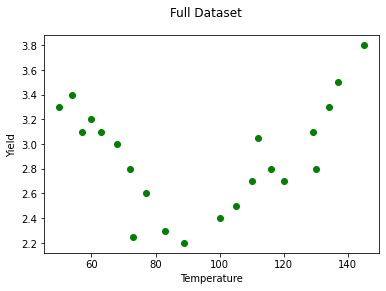

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

yld = pd.read_csv('yield2.csv', sep='\s+', index_col=0)

y = yld['Yield']
X = yld[['Temp']]

fig, ax = plt.subplots()
ax.scatter(X, y, color='green')
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle('Full Dataset');

Let's split this dataset in a training set, containing 70% of the observations, and a test set, containing 30% of the observations.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)

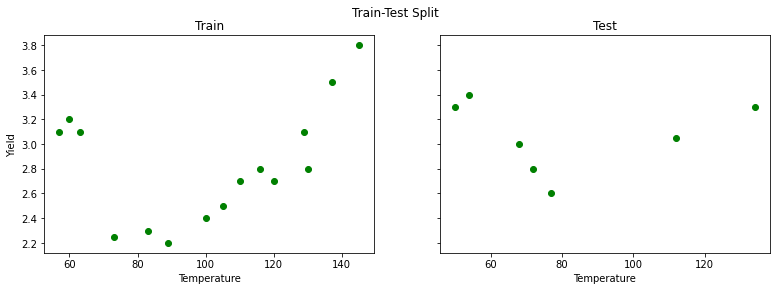

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.suptitle('Train-Test Split');

There seems to be a downward trend first, then upwards. Despite this, let's go ahead and start by fitting a simple linear regression:

In [4]:
reg = LinearRegression().fit(X_train, y_train)

When plotting a simple linear regression model there are no unexpected results: the line is a bad fit, both for training and test set.

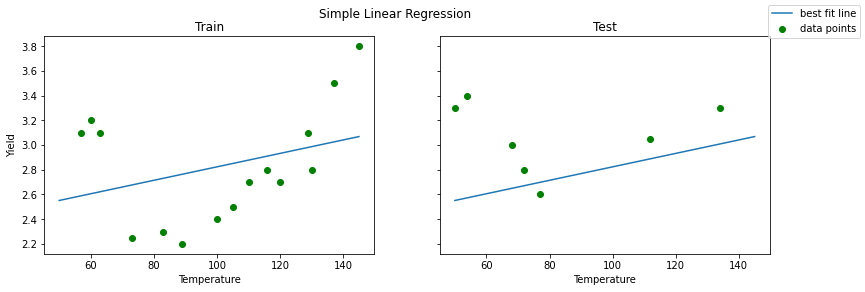

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)
X_linspace = pd.DataFrame(np.linspace(50, 145, 50), columns=['Temp'])

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg.predict(X_linspace), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg.predict(X_linspace))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('Simple Linear Regression');

When including polynomials, however, the result changes. We included a polynomial of 6 here. The result seems to be very accurate for the training set, but the picture is definitely different for the test set on the right-hand side. Where the fit seemed to be good for the training set, the test set fit is not nearly as good. The problem is that our model did *not generalize well* to cases outside the training set.

In [6]:
# 6th degree polynomial
poly = PolynomialFeatures(6)
reg_poly = LinearRegression().fit(poly.fit_transform(X_train), y_train)

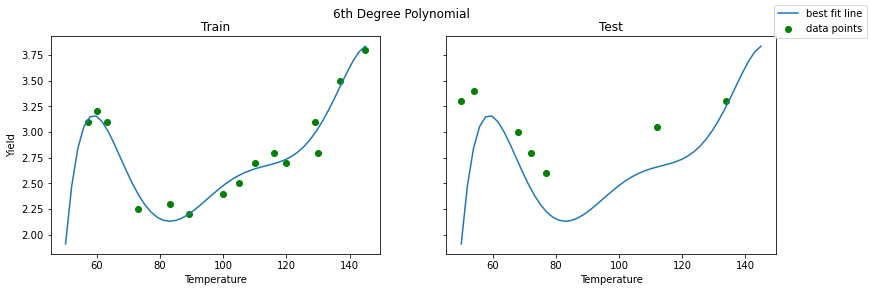

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('6th Degree Polynomial');

Let's have a look at the train vs. test mean squared error for the two models:

In [8]:
print(f"""
Simple Linear Regression
Train MSE: {mean_squared_error(y_train, reg.predict(X_train))}
Test MSE:  {mean_squared_error(y_test, reg.predict(X_test))}

6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}
""")


Simple Linear Regression
Train MSE: 0.18250661207533306
Test MSE:  0.21472110882651188

6th Degree Polynomial
Train MSE: 0.010505179826003104
Test MSE:  0.38980447896449394



These numbers align with the plots above. The simple linear regression has poor MSE scores for both the train and test data. The 6th degree polynomial regression has a better train MSE than simple linear regression, and a worse test MSE.

## Underfitting and Overfitting

Let's formalize this:

> *Underfitting* happens when a model cannot learn the training data, nor can it generalize to new data.

The **simple linear regression** model fitted earlier was an **underfitted** model.

> *Overfitting* happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data 

The **6-degree polynomial** was **overfitted**.

Now, let's have a look at the same plots but with second degree polynomial.

Another way to look at it - Imagine you're learning to play a video game. You want to get really good at it, but you also want to be able to play well when you face new challenges.

Underfitting is like not learning the game rules well enough. You keep losing because you don't understand how to play, and even if someone shows you how to win, you still struggle. Your understanding of the game is too basic, so you can't win consistently, even against opponents you've faced before.

Overfitting, on the other hand, is like learning the game too well, almost to the point of memorizing every single move your opponents make. You become really good at beating the same opponents you've played with before, but when you face a new opponent with different strategies, you struggle. You're so focused on the specific patterns you've seen before that you can't adapt to new challenges.

So, underfitting means your model is too simple and can't capture the patterns in the data, while overfitting means your model is too complex and memorizes the training data without understanding the underlying patterns, making it fail when faced with new, unseen data.

In [9]:
# 2nd degree polynomial
poly_2 = PolynomialFeatures(2)  
reg_poly_2 = LinearRegression().fit(poly_2.fit_transform(X_train), y_train)

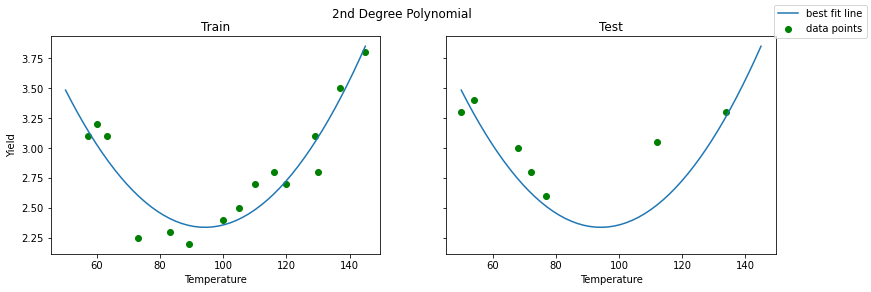

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('2nd Degree Polynomial');

That looks like a more reasonable model. Let's look at the MSE scores:

In [11]:
print(f"""
Simple Linear Regression
Train MSE: {mean_squared_error(y_train, reg.predict(X_train))}
Test MSE:  {mean_squared_error(y_test, reg.predict(X_test))}

6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}

2nd Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly_2.predict(poly_2.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly_2.predict(poly_2.transform(X_test)))}
""")


Simple Linear Regression
Train MSE: 0.18250661207533306
Test MSE:  0.21472110882651188

6th Degree Polynomial
Train MSE: 0.010505179826003104
Test MSE:  0.38980447896449394

2nd Degree Polynomial
Train MSE: 0.02786876093087891
Test MSE:  0.0612423773614243



The fit for the training set became worse with the 2nd degree polynomial compared to the 6th degree polynomial, but we can clearly see how the test set performance improved by looking at the mean squared error. Also, it seems like the results for training and test set are comparable, which is what you would want in general.

Based on this analysis, it appears that a 2nd degree polynomial achieves the correct degree of balance between underfitting (like the simple linear regression) and overfitting (like the 6th degree polynomial).

So, imagine you've been playing this video game for a while, and you're trying to find the best way to win consistently. You've tried different strategies, but you want to find one that's just right—not too simple that you keep losing, but not too complicated that you only win with certain opponents.

Now, think of each strategy as a different degree of polynomial. The simple strategies are like linear strategies, where you just move forward without much variation. The more complex strategies are like high-degree polynomials, where you make lots of complicated moves based on specific patterns you've seen before.

So, you try out a 2nd degree polynomial strategy and a 6th degree polynomial strategy. With the 6th degree polynomial, you start to memorize every single move your opponents make. It seems great at first because you're winning against the opponents you've faced before (similar to how the training set performance might improve). But then you try it against a new opponent, and you keep losing because you're too focused on those specific patterns.

On the other hand, with the 2nd degree polynomial strategy, you find a good balance. You understand the game well enough to adapt to new challenges, but you're not so focused on specific patterns that you can't handle new situations. You're winning consistently against both familiar and new opponents, which is what you want in general.

So, just like finding the right strategy in the video game, finding the right degree of polynomial is about striking a balance between underfitting and overfitting. The 2nd degree polynomial seems to achieve that balance—it's not too simple, so it captures enough of the patterns in the data, but it's not too complex, so it can adapt to new challenges effectively.




## Bias-Variance Tradeoff

Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. The idea is that we can decompose the mean squared error as the sum of: 

- *bias*
- *variance*, and
- *irreducible error* 

Formally, this is written as: 
$ MSE = Bias(\hat{f}(x))^2 + Var(\hat{f}(x)) + \sigma^2$. The derivation of this result can be found on the Wikipedia page of the bias-variance trade-off, [here](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation).

### Bias

While you have probably heard of "machine learning bias" in a colloquial sense, e.g. [racial discrimination in facial recognition technologies](https://sitn.hms.harvard.edu/flash/2020/racial-discrimination-in-face-recognition-technology/), this is using a different definition of "bias". Bias in this context means a poor model fit. For example, the simple linear regression applied to the `Yield` dataset has high bias, because the model assumes a linear relationship when it appears that the actual relationship is polynomial.

This kind of bias can arise from model assumptions being violated, or simply using the wrong type of model for the underlying relationship.

**High bias** leads to **underfitting**.

### Variance

Variance is also a term used elsewhere in statistics, but in this context it means that the model's performance varies too much based on small fluctuations in the training set. A model with high variance is usually trying to fit based on the irreducible error, which is actually just random noise and is not helpful in making predictions on unseen data.

**High variance** leads to **overfitting**.

### Irreducible Error

Most of the time there will be some amount of error that is impossible to remove, regardless of whether the model is perfectly specified based on the available features. Often this is because there is some missing feature, or simply because there is random variation in the variables that is not related to the underlying relationship.

If error is larger than 0, this may because of irreducible error, not because of underfitting or overfitting.

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/new_bias_variance.png" alt="Drawing" width="500">

The balance between bias and variance is a tradeoff. We can reduce the variance but then there is a risk of running a bigger bias, and vice versa. **Bias** is usually associated with **low model complexity**, **variance** with **high model complexity**. There is generally a "sweet spot" in-between, compromising between bias and variance.

## Additional resources

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

## Summary

Great, now you know what bias-variance tradeoff is, what underfitting and overfitting are, and how all of these relate, let's dive in for some practice!